In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def loadJson(path):
    f = open(path)
    data = json.load(f)
    f.close()
    return data

def moving_average(x, width):
    return np.convolve(x, np.ones(width), 'valid') / width

def computeNormAvg(movie, avgWidth):
    neg = [entry[1] for entry in movie]
    pos = [entry[2] for entry in movie]
    avgNeg = moving_average(neg, avgWidth)
    avgPos = moving_average(pos, avgWidth)
    diff = []
    for i in range(len(avgPos)):
        diff.append(avgPos[i] - avgNeg[i])
    x = [entry[0] for entry in movie[:len(avgPos)]]
    factor = 100 / x[-1]
    normx = [r * factor for r in x]
    return normx, avgNeg, avgPos, diff

def plot(x, neg=None, pos=None, diff=None, poly=None):
    plt.figure(figsize=(8, 4), layout='constrained')
    if neg is not None: plt.plot(x, neg, color="red", label="neg")
    if pos is not None: plt.plot(x, pos, color="green", label="pos")
    if diff is not None: plt.plot(x, diff, color="blue", label="delta")
    if poly is not None: plt.plot(x, poly, color="green", label="fit")
    plt.axhline(y=0, color="black", linestyle='--')
    plt.xlabel("time [s]")
    plt.ylabel("sentiment")
    plt.legend()

In [35]:
f1 = loadJson("0a2db902f30c11edb451b8aeed79c0cc.json")
f2 = loadJson("0a5ebcc4f30611edb451b8aeed79c0cc.json")
f3 = loadJson("68a31a0cf30411edb451b8aeed79c0cc_interstellar.json")

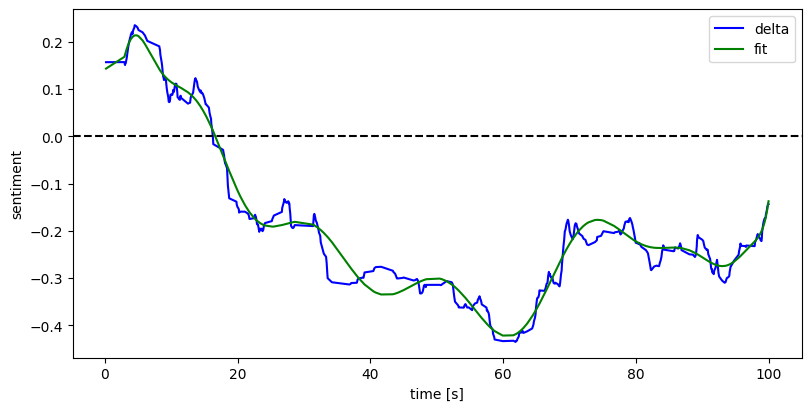

In [36]:
# Movie 1
x, neg, pos, diff = computeNormAvg(f1, 128)
fit1 = list(np.polyfit(x, diff, 16))
fit1.reverse()
func = [sum([val**i * fit1[i] for i in range(len(fit1))]) for val in x]
plot(x, diff=diff, poly=func)

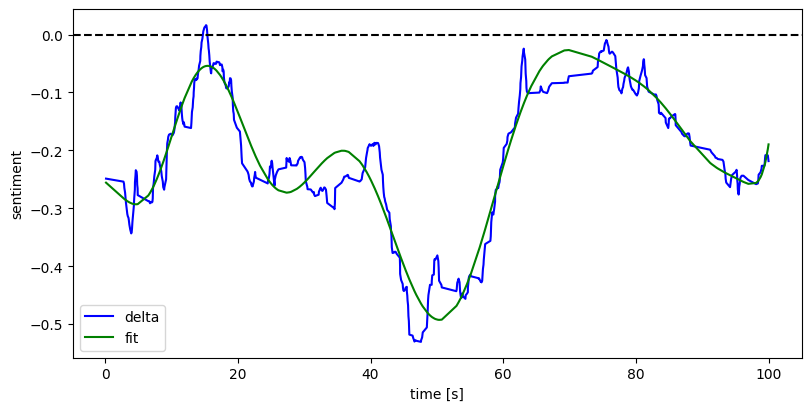

In [37]:
# Movie 2
x, neg, pos, diff = computeNormAvg(f2, 128)
fit2 = list(np.polyfit(x, diff, 16))
fit2.reverse()
func = [sum([val**i * fit2[i] for i in range(len(fit2))]) for val in x]
plot(x, diff=diff, poly=func)

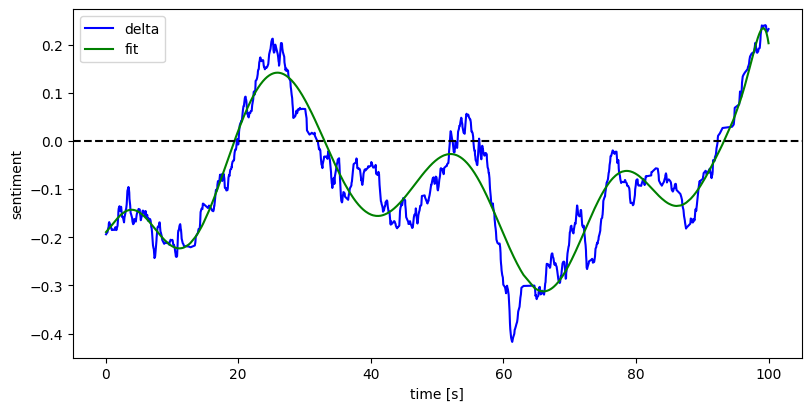

In [38]:
# Movie 3
x, neg, pos, diff = computeNormAvg(f3, 128)
fit3 = list(np.polyfit(x, diff, 16))
fit3.reverse()
func = [sum([val**i * fit3[i] for i in range(len(fit3))]) for val in x]
plot(x, diff=diff, poly=func)

In [39]:
nfit1 = np.array(fit1)
nfit2 = np.array(fit2)
nfit3 = np.array(fit3)

mse12 = ((nfit1 - nfit2)**2).mean()
mse13 = ((nfit1 - nfit3)**2).mean()
mse23 = ((nfit2 - nfit3)**2).mean()
print(mse12, mse13, mse23)

0.01693184612473223 0.014929173035783805 0.0002919829557470261
